### `list_attr_celeba` Dataset
A popular component of computer vision and deep learning revolves around identifying faces for various applications from logging into your phone with your face or searching through surveillance images for a particular suspect. This dataset is great for training and testing models for face detection, particularly for recognising facial attributes such as finding people with brown hair, are smiling, or wearing glasses. Images cover large pose variations, background clutter, diverse people, supported by a large quantity of images and rich annotations. This data was originally collected by researchers at MMLAB, The Chinese University of Hong Kong (specific reference in Acknowledgment section).



- 202,599 number of face images of various celebrities
- 10,177 unique identities, but names of identities are not given
- 40 binary attribute annotations per image

You can obtain the dataset from https://www.kaggle.com/jessicali9530/celeba-dataset

In [9]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os
import keras
from keras import optimizers
from keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from keras.utils import to_categorical
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.models import Sequential
from keras.layers import Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.layers import Flatten

In [10]:
# from PIL import Image
# import os

# dir_path = r"C:\Users\Owner\Desktop\Mangimind Data Science Bootcamp\Deep learning\img_align_celeba"

# for filename in os.listdir(dir_path):
#     if filename.endswith(".jpg"):  
#         try:
#             img = Image.open(os.path.join(dir_path, filename))
#             img.verify()  
#         except (IOError, SyntaxError) as e:
#             print('Bad file:', filename) 


In [11]:
df=pd.read_csv(r"C:\Users\Owner\Desktop\Mangimind Data Science Bootcamp\Deep learning\list_attr_celeba.csv")

df.head()
df.columns.values

array(['image_id', '5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive',
       'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose',
       'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair',
       'Bushy_Eyebrows', 'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee',
       'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones', 'Male',
       'Mouth_Slightly_Open', 'Mustache', 'Narrow_Eyes', 'No_Beard',
       'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline',
       'Rosy_Cheeks', 'Sideburns', 'Smiling', 'Straight_Hair',
       'Wavy_Hair', 'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Lipstick',
       'Wearing_Necklace', 'Wearing_Necktie', 'Young'], dtype=object)

In [12]:
df

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202594,202595.jpg,-1,-1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1
202595,202596.jpg,-1,-1,-1,-1,-1,1,1,-1,-1,...,-1,1,1,-1,-1,-1,-1,-1,-1,1
202596,202597.jpg,-1,-1,-1,-1,-1,-1,-1,-1,1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
202597,202598.jpg,-1,1,1,-1,-1,-1,1,-1,1,...,-1,1,-1,1,1,-1,1,-1,-1,1


#### See sample image

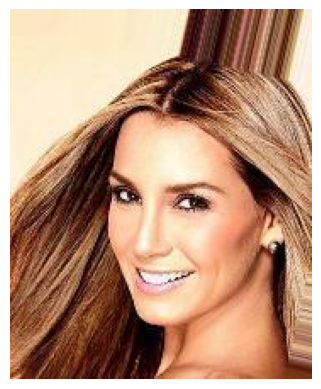

In [13]:
sample_filename = df.iloc[0, 0]
sample_image = load_img(os.path.join(r'C:\Users\Owner\Desktop\Mangimind Data Science Bootcamp\Deep learning', 'img_align_celeba', sample_filename))
plt.imshow(sample_image)
plt.axis('off')
plt.show()

### 4. Build Model

- First, copy VGG16 without the dense layers, use the weights from `imagenet`. Set the input shape to `(178,218,3)`.
- Freeze the layers except the last two layers and print to see if the layers are trainable or not.
- Build your sequential model (you are free to use a functioanl API as a further exercise). Include all the frozen VGG layers to your model. Add a Dense layer with 128 inouts and `relu` activation. Add a batch nomalizer, then a dense layer as the output layer. 
- Create an early stopping criteria monitorin the loss value for the validation set. Stop the search if the loss value deosnt change for two consecutive times.
- Compile the model.
- Save the best model automatically based on the performance of the validation set.

In [14]:
base_model = VGG16(weights= 'imagenet', include_top=False, input_shape=(178,218,3))

for layer in base_model.layers:
    layer.trainable = False
    
# base_model.layers[-1].trainable = True
# base_model.layers[-2].trainable = True

for layer in base_model.layers:
    print(layer, layer.trainable)
    

<keras.src.engine.input_layer.InputLayer object at 0x0000029E4EA54CA0> False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x0000029E4D650B80> False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x0000029E4D651300> False
<keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x0000029E4D652020> False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x0000029E4D6526E0> False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x0000029E4D652D40> False
<keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x0000029E4D653040> False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x0000029E4D6538B0> False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x0000029E4D651660> False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x0000029E4D755180> False
<keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x0000029E4D756080> False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x0000029E4D756A40> False


In [31]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.layers import Dropout
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
early_stopping = EarlyStopping(monitor='val_loss', patience=2)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

In [27]:
from tensorflow.keras.layers import Dropout

## 5. Data Preparation

- Create a validation set with 20% of the data. Check the number of data points per class from both the train and validation sets.
- Set your batch size to 20.
- Create the data generator and set the `preprocessing_function` to `preprocess_input` of VGG16.
- Create train and validation data generators (batches will be picked up from the dataframe). Set target size to (178,218) (you can try something else, but you need to do the corresponding change in the model).
- Set your validation  and epoch step size (`validation_steps` and `steps_per_epoch`)

In [17]:
df=pd.read_csv(r"C:\Users\Owner\Desktop\Mangimind Data Science Bootcamp\Deep learning\list_attr_celeba.csv")
df.loc[df['Male'] == -1,'Male'] = "female"
df.loc[df['Male'] == 1,'Male'] = "male"


In [18]:
df_gender = df[['image_id','Male']]
df_gender = df_gender.rename(columns={'Male': 'Gender'}) 


In [19]:
df_gender

,image_id,Gender
0,000001.jpg,female
1,000002.jpg,female
2,000003.jpg,male
3,000004.jpg,female
4,000005.jpg,female
...,...,...
202594,202595.jpg,female
202595,202596.jpg,male
202596,202597.jpg,male
202597,202598.jpg,female


In [20]:
df_gender.columns

Index(['image_id', 'Gender'], dtype='object')

In [21]:
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(df_gender, test_size=0.2, stratify=df_gender['Gender'], random_state=42)
print("Number of train samples:", len(train_df))
print("Number of validation samples:", len(val_df))

Number of train samples: 162079
Number of validation samples: 40520


In [32]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import preprocess_input

batch_size = 10

datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [33]:
sample_fraction = 0.05
train_sample = train_df.sample(frac=sample_fraction, random_state=42)
val_sample = val_df.sample(frac=sample_fraction, random_state=42)

In [34]:
image_directory = r"C:\Users\Owner\Desktop\Mangimind Data Science Bootcamp\Deep learning\img_align_celeba"  # Replace with your actual directory

train_generator = datagen.flow_from_dataframe(
    dataframe=train_sample,
    directory=image_directory, 
    x_col='image_id',
    y_col='Gender',
    target_size=(178, 218),
    class_mode='binary', 
    batch_size=batch_size,
    shuffle=True
)

val_generator = datagen.flow_from_dataframe(
    dataframe=val_sample,
    directory=image_directory, 
    x_col='image_id',
    y_col='Gender',
    target_size=(178, 218),
    class_mode='binary', 
    batch_size=batch_size,
    shuffle=False
)

Found 8104 validated image filenames belonging to 2 classes.
Found 2026 validated image filenames belonging to 2 classes.


## 6. Train the Model

- Fit the model
- save the model

In [35]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_sample.shape[0] // batch_size,
    epochs=10,
    validation_data=val_generator,
    validation_steps=val_sample.shape[0] // batch_size
)

Epoch 1/10
788/810 [============================>.] - ETA: 8s - loss: 0.2843 - accuracy: 0.8833

In [98]:
model.save('my_model.h5')

C:\Users\Owner\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 428ms/step


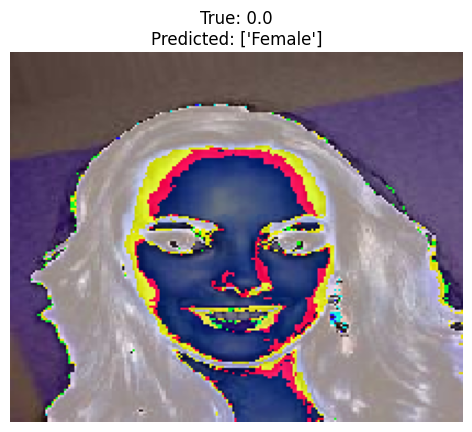

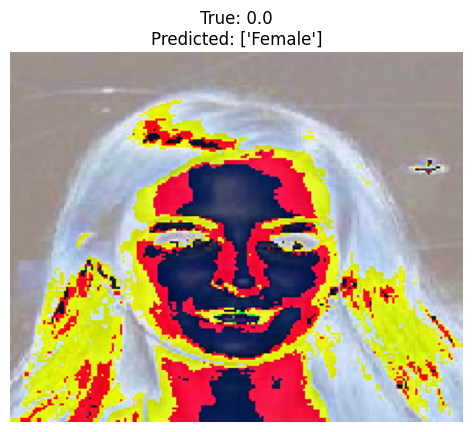

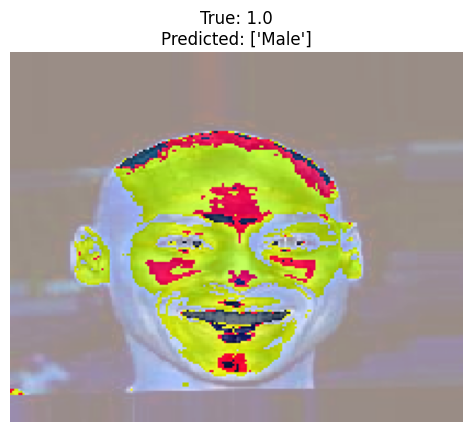

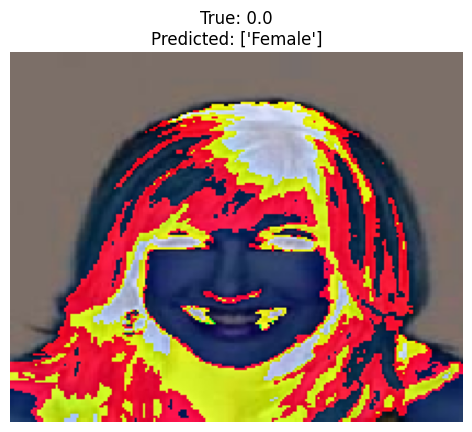

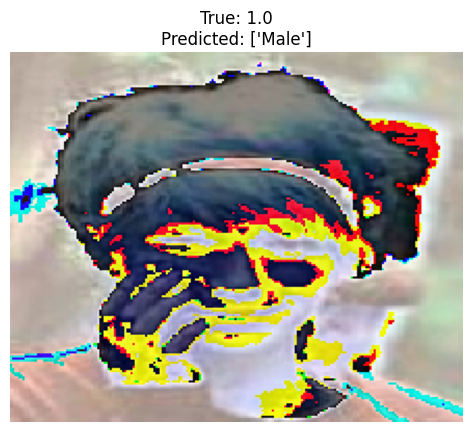

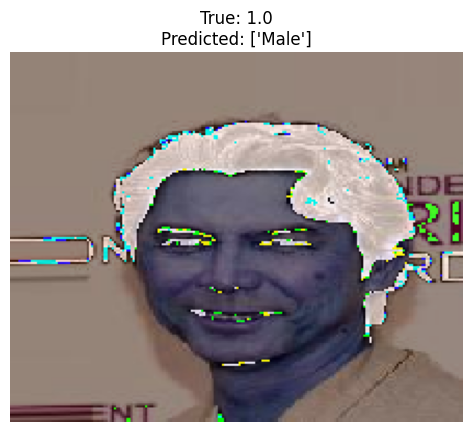

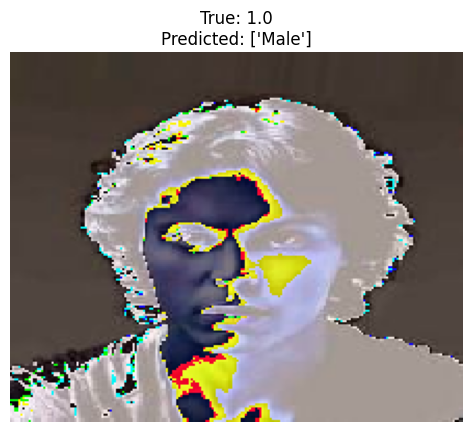

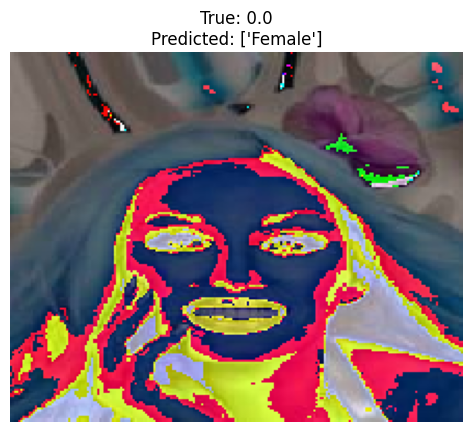

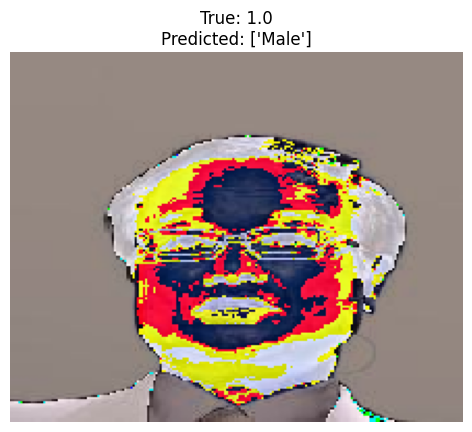

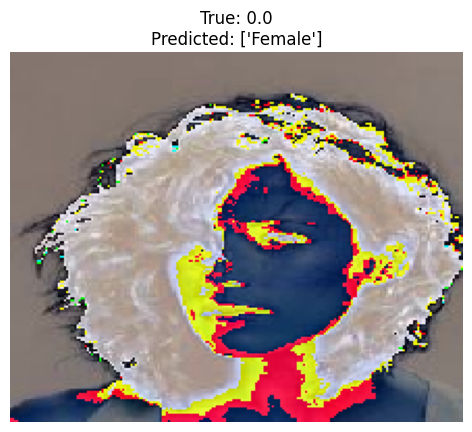

In [101]:
images, true_labels = next(val_generator)
predicted_scores = model.predict(images)
predicted_labels = np.where(predicted_scores > 0.5, "Male", "Female")
predicted_images = 10
for i in range(predicted_images):
    plt.imshow(images[i].astype(np.uint8))
    plt.title(f"True: {true_labels[i]}\nPredicted: {predicted_labels[i]}")
    plt.axis('off')
    plt.show()